# Python Workshop for Physics Students by SPS!

## Today is:

## Schedule:

- Every friday from 1:30 P.M. to 3:30 P.M.


## Instructors:
- Aldo
- Tadeo
- Byron J. Encinas Velázquez

## What we'll learn today

- [ ] Read data
- [ ] Calculate velocity
- [ ] Calculate position
- [ ] Plot movement
- [ ] Calculate energies
- [ ] Plot energies
- [ ] What is the movement like




## <font color='white'>We highly encourage you to try some of this concepts in your machine while we are discussing and explaining them</font>

In [ ]:
# importing section
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Math

this is a built inside python library, which means we don't have to download it. So we can import it without much issue

In [ ]:
print(math.pi)

3.141592653589793


In [ ]:
# this is a very important feature of the math module

big_number = math.inf

print(big_number)

# which might look like nothing, but

print(1e+5 > big_number) # every number is tiny next to infinity!

inf
False


In [ ]:
x = math.ceil(3.9)
print(x)

4


In [ ]:
y = math.floor(3.5)
print(y)

3


$$ Comb(x,y)  = \frac{n!}{k!(n-k)!}$$

Return the number of ways to choose k items from n items without repetition and without order.

In [ ]:
math.comb(4, 2)

6

Then a less modest number of features in library math are

### Inverse Trigonometric & Hiperbolic Functions



A quick reminder on how Inverse Functions work.

We have

$$\sin(x) = y$$

we want a inverse function (inverse in the sense of inversion of an operation)

such that I can get $x$ if I apply it to $y$


$$f^{-1}(y) = x$$

then we have the $\arcsin(x)$ function that when I insert $\sin(x)$ as it's argument, I get $x$.

$$\arcsin(\sin(x)) = x$$

And like that, almost all elemental functions have it's own inverse.

i.e.

$$\log_a(a^{x}) = x$$ the inverse of a number to power of $x$ is tha logarithm base $a$
$$\sqrt{x^2} = x$$ The inverse of squearing $x$ is the square root


In [ ]:
'''
if sin(\pi/2) = 1
'''
print("The numerical value of pi/2 is: ", math.pi/2)
print("The value of sin(pi/2) is:      ", math.sin(math.pi/2))


The numerical value of pi/2 is:  1.5707963267948966
The value of sin(pi/2) is:       1.0


In [ ]:
'''
having

The numerical value of pi/2 is:  1.5707963267948966
The value of sin(pi/2) is:       1.0

then arcsin(1) = \pi/2 it basicly undoes the sine operation
'''
print("The value of arcsin(1.0) is:      ", math.asin(1.0))


The value of arcsin(1.0) is:       1.5707963267948966


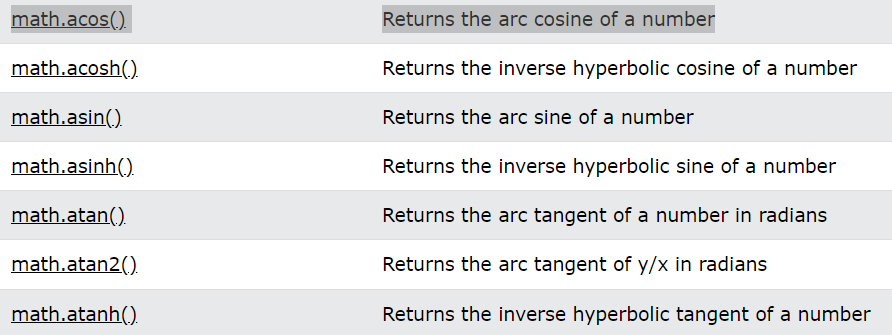

In [ ]:
'''
But this are mathematical functions, which normal python doesn't have.

(Fortran does have them)
'''

"\nBut this are mathematical functions, which normal python doesn't have.\n\n(Fortran does have them)\n"

In [ ]:
x = math.pi/2

print("Our angle is:", x, "radians")

print(f"The sine of {x} is:", math.sin(x))

y = math.sin(x)

Our angle is: 1.5707963267948966 radians
The sine of 1.5707963267948966 is: 1.0


In [ ]:
print(f" The Inverse Sine of {y} is:", math.asin(y))

 The Inverse Sine of 1.0 is: 1.5707963267948966


### So what follows are some other functions that python may or may not have, but improved or facilitating us the work in some way.

In [ ]:
# to convert from radians to degrees and vice-versa

# we have an angle
angle = 30 # degrees

print(angle)

# we want it in radians
angle = math.radians(angle)

print(angle)

30
0.5235987755982988


In [ ]:
# we may even want to undo that

# we have an angle in radians
angle = math.pi/6.0 # => 30 degrees

print(angle)

# we want it in radians
angle = math.degrees(angle) # => almost 30 degrees

print(angle)

0.5235987755982988
29.999999999999996


### Resources for Math Library

- https://www.w3schools.com/python/module_math.asp

## Numpy

A widely used library for mathematical methods, numerical calculations and also a compendium of many important mathematical and physical constants.

### Creating Arrays in Numpy

    var = np.arange(start, finish, stepsize)

In [ ]:
a = [1,2,3]

print(a*5)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


In [ ]:
a = np.array([1,2,3])

print(a*5)

[ 5 10 15]


In [ ]:
'''
To create a Numpy Array as a succession of numbers
'''

to_ten = np.arange(0,12,3) # it works the same as in the for loops
to_ten

array([0, 3, 6, 9])

    var = np.linspace(start, finish, partitions)

In [ ]:
# we also have that does almost the same

to_twelve = np.linspace(0,12,3)
to_twelve

array([ 0.,  6., 12.])

### Arrays in Numpy

In [ ]:
import numpy as np

sample_array = np.array([1.5,2.0,3.0])
sample_array

array([1.5, 2. , 3. ])

In [ ]:
# it is as simple as lists but optmized for specific data manipulation

# such as

print([1,2,3]*2) # we obtain a new list as 2 times the repetition of the original

[1, 2, 3, 1, 2, 3]


In [ ]:
# but if we do this with a numpy array

print(sample_array*2) # each element independtly gets multiplied by 2

[3. 4. 6.]


In [ ]:
# it also allows us to create very specific arrays

zeros_array = np.zeros((3,4))
print("Array of zeros")
print(zeros_array)
print()

ones_array = np.ones((2,3,4), dtype=np.int16) # look, it even allows us to tell the computer how many space in disk we want to use to store the each value
print("Array of ones")
print(ones_array)
print()


Array of zeros
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Array of ones
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]



According to numpy documentation

> <code>empty()</code>, unlike <code>zeros()</code>, does not set the array values to zero, and may therefore be marginally faster. On the other hand, it requires the user to manually set all the values in the array, and should be used with caution.



In [ ]:
# let's talk about this for a bit and why it can be very useful for physicist

empty_array = np.empty((2,3))

print("Empty array No. 1")
print(empty_array)

Empty array No. 1
[[1.e-05 1.e-05 1.e-05]
 [1.e-05 1.e-05 1.e-05]]


In [ ]:
empty_array = np.empty((3,3))

print("Empty array No. 12")
print(empty_array)

Empty array No. 12
[[4.96       0.         0.41722222]
 [0.         3.696      0.33722222]
 [0.         0.         1.        ]]


In [ ]:
# now if we are interested in changing values in a numpy array

arr=np.array([1,4,2,8,9,0,5])

print(arr)

[1 4 2 8 9 0 5]


In [ ]:
# adding values at the end

arr=np.append(arr,7)

print(arr)

[4 2 8 9 0 5 7 7 7 7 7 7]


In [ ]:
#Eliminar elemento en el indice 0

arr=np.delete(arr,0)

print(arr)

[7 7 7 7 7 7]


In [ ]:
arr=np.insert(arr,2,10)

print(arr)

### Modifyng Arrays in Numpy

## Matplotlib with Examples

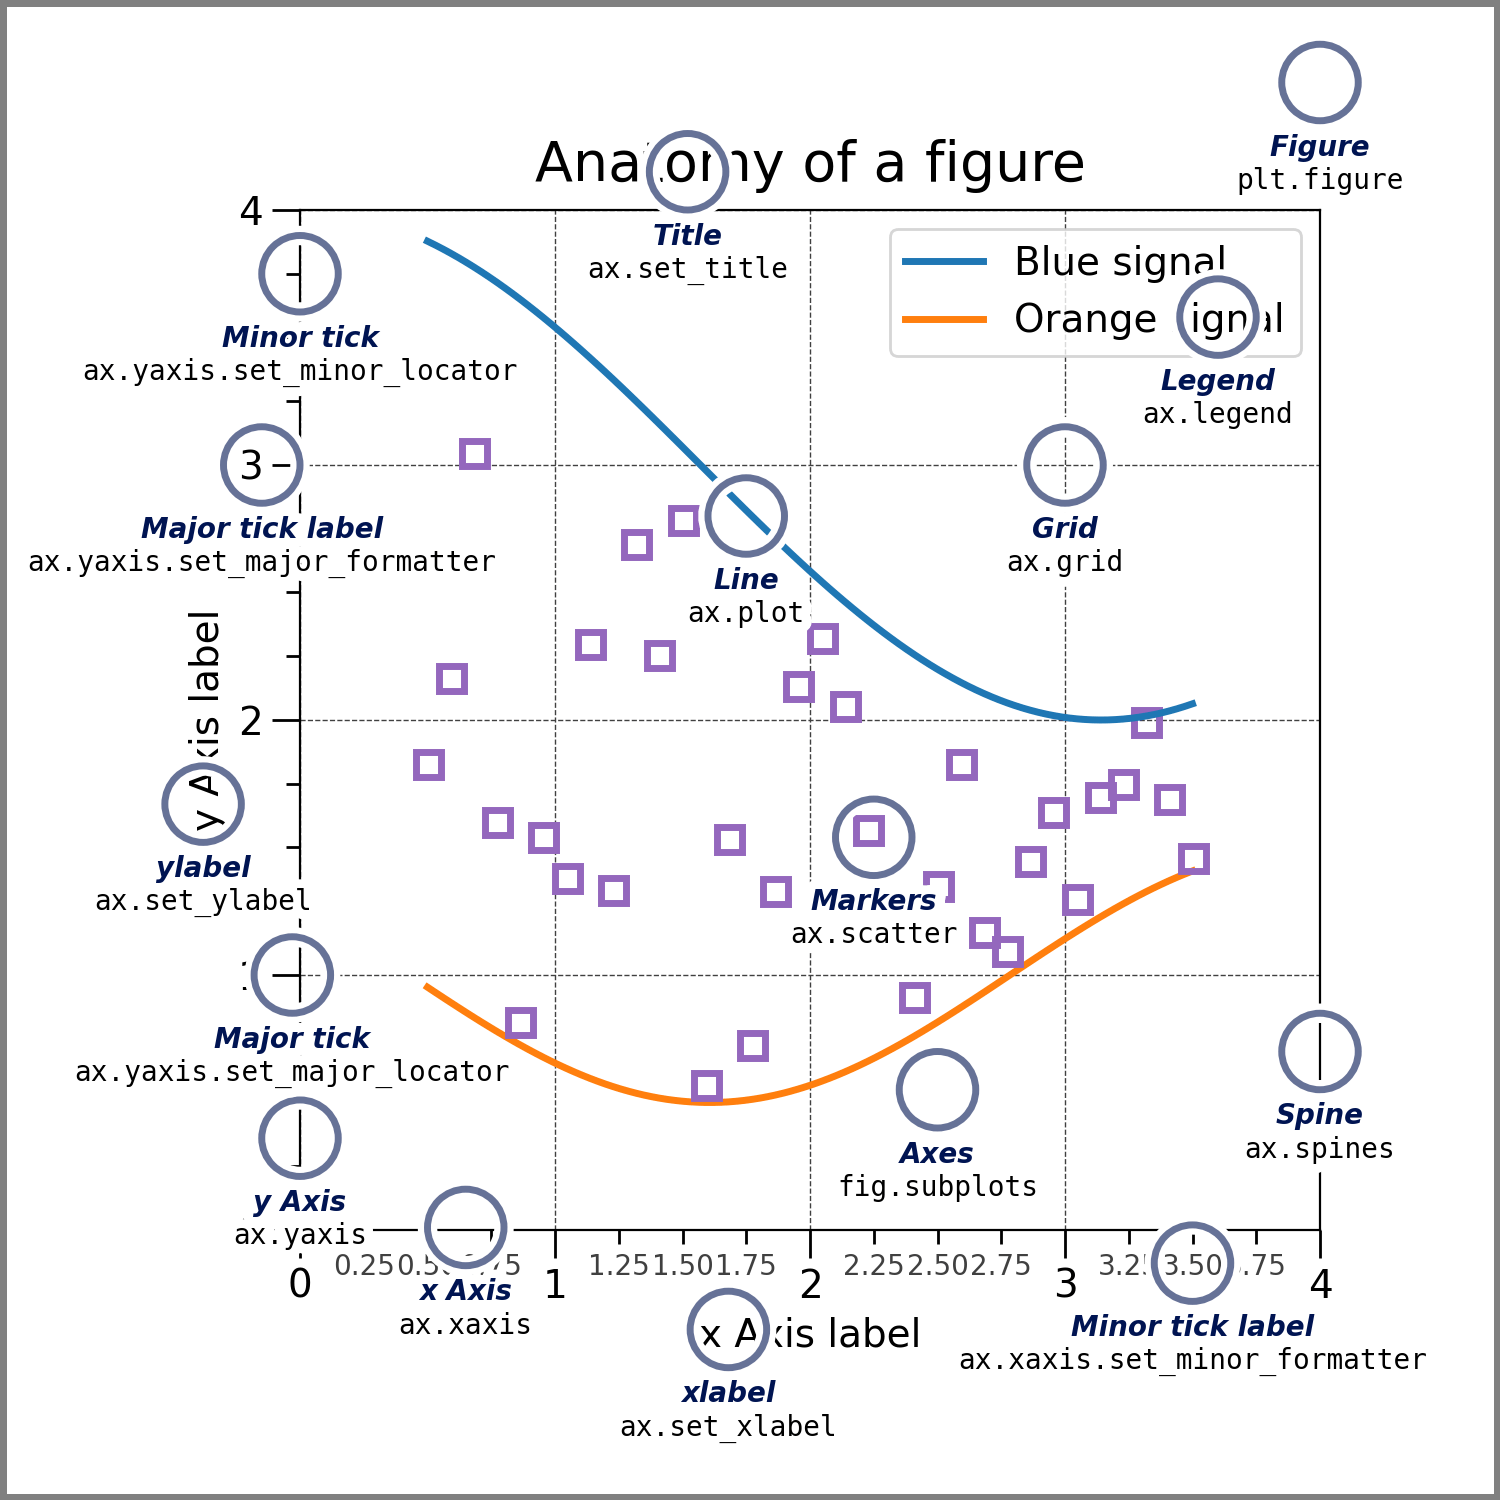

In [ ]:
# quick setup for a graph

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

In [ ]:
# we will try to use all elements in the picture to knowledge

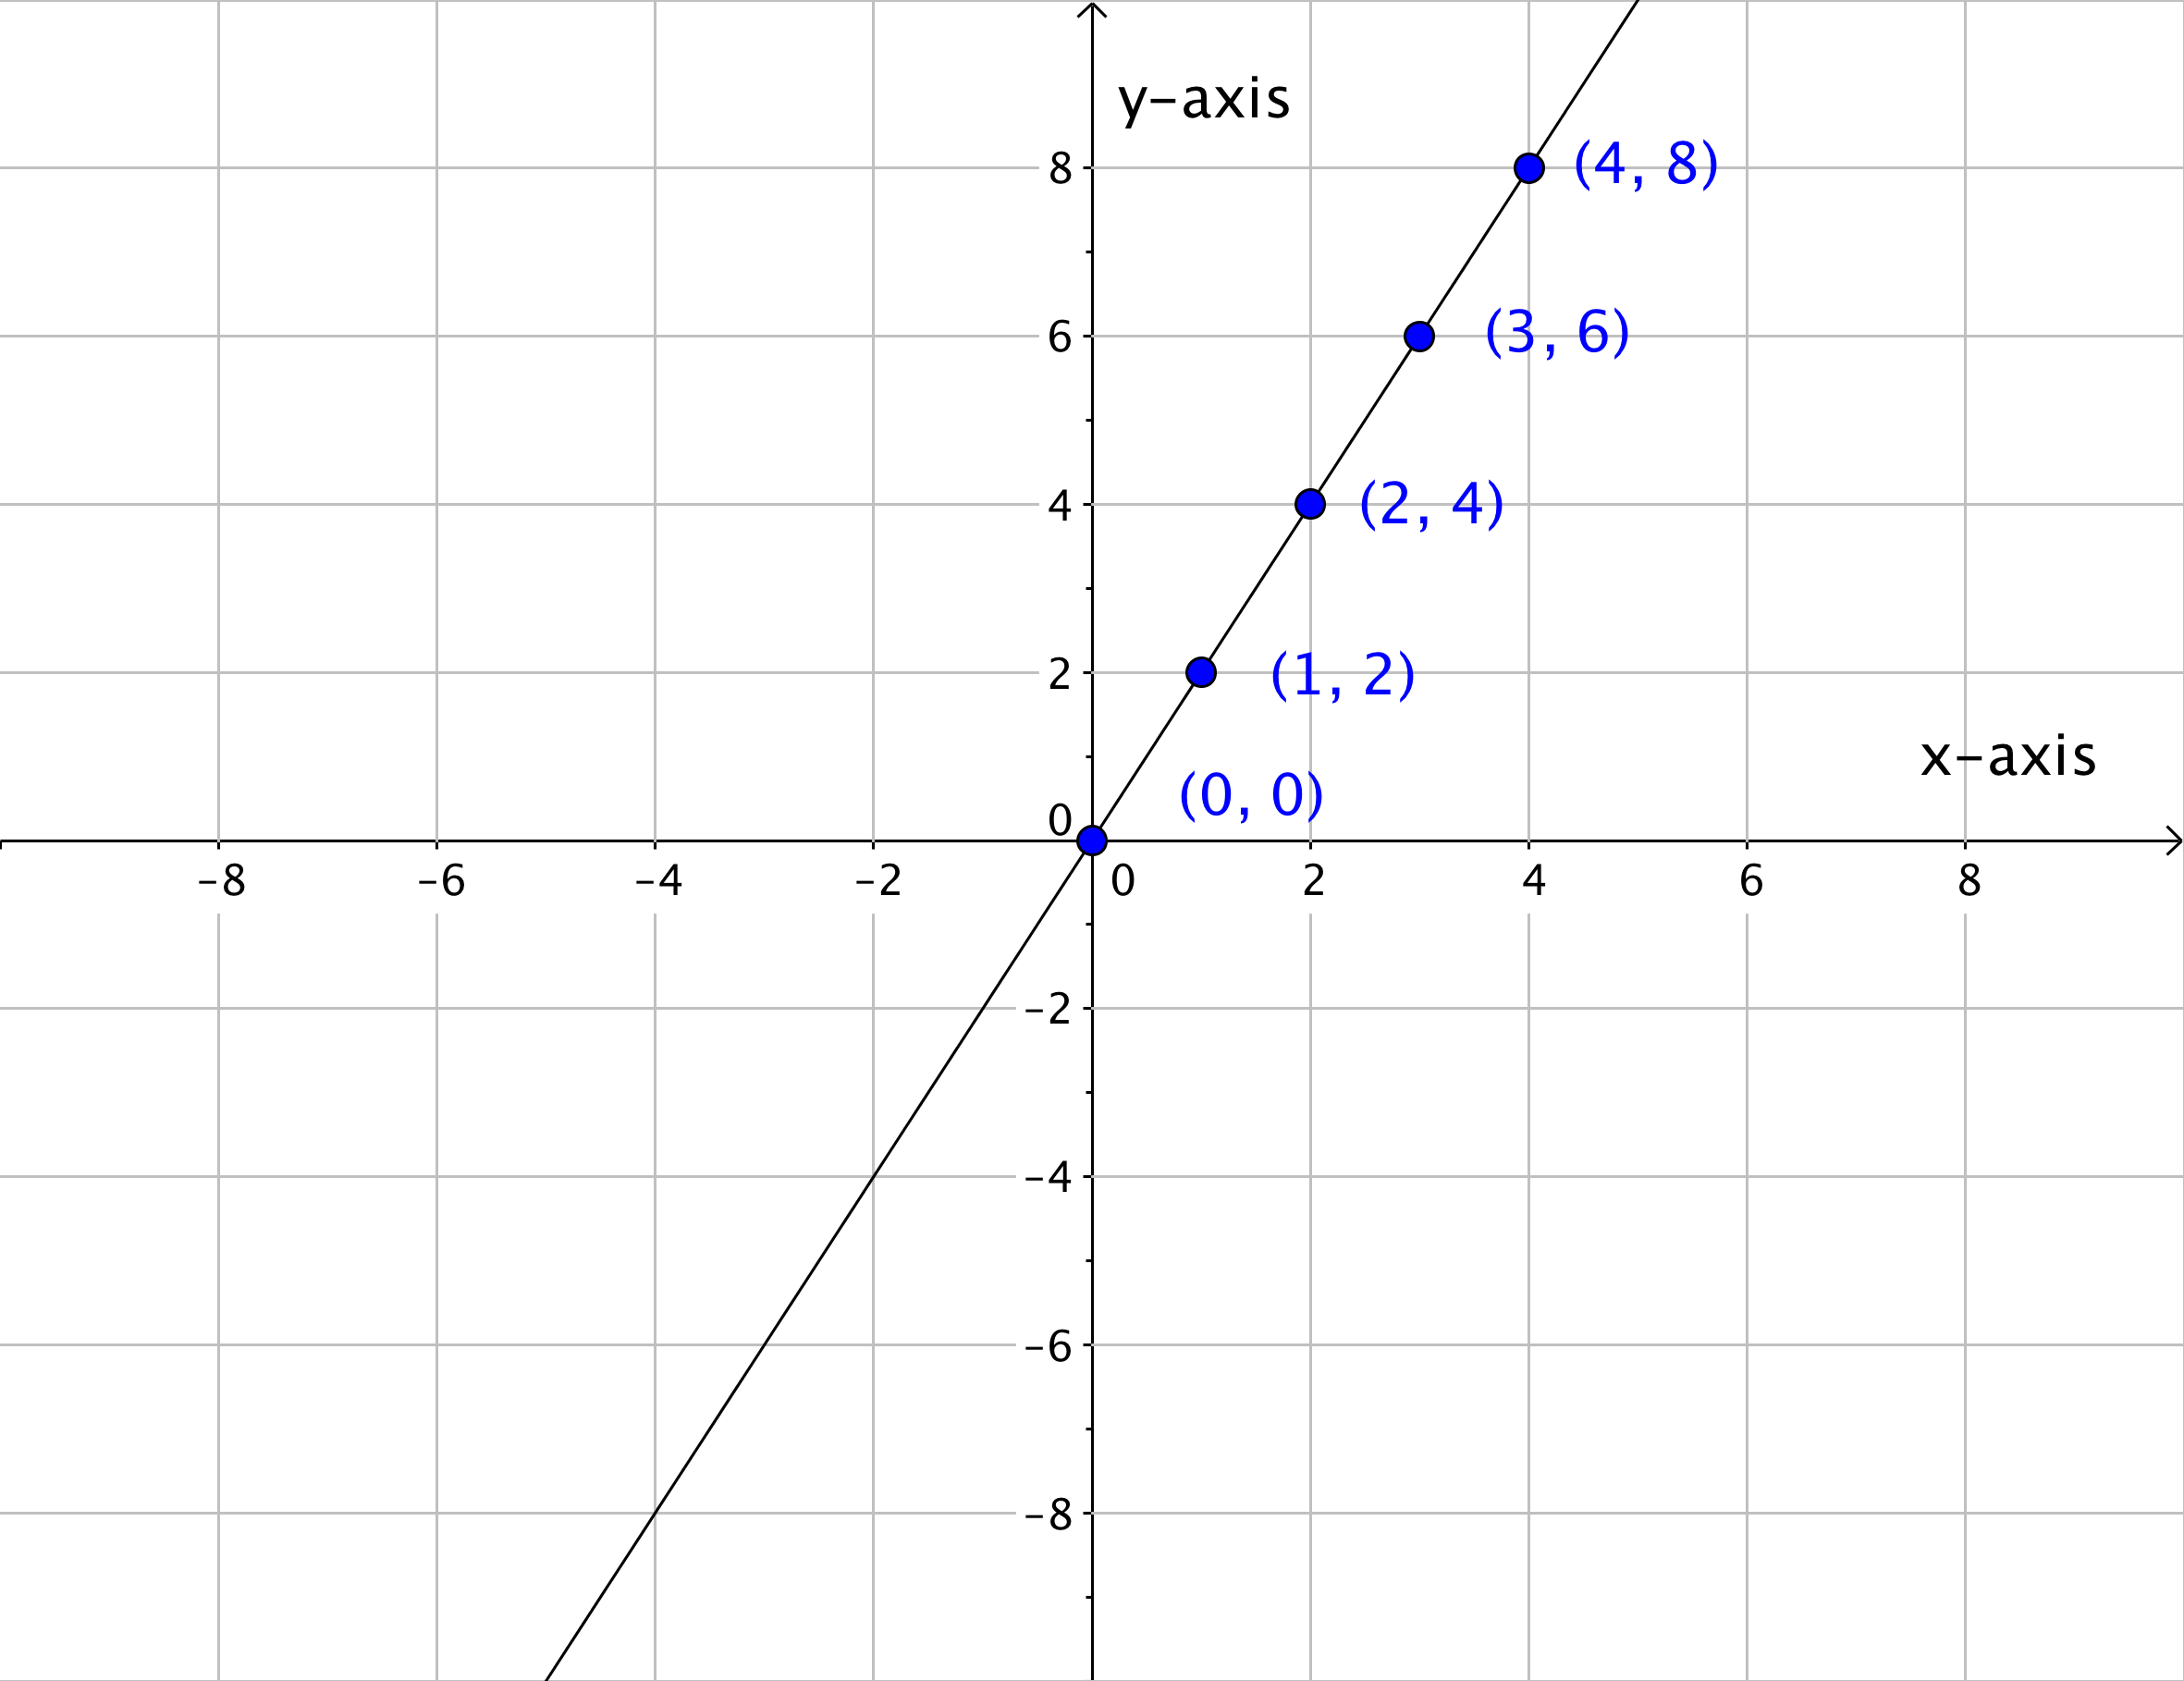

In [ ]:
'''
To plot data we need (x,y) pairs

Our main goal is to make to sets of data

(we are taking a example from matplotlib Documentaation)

'''

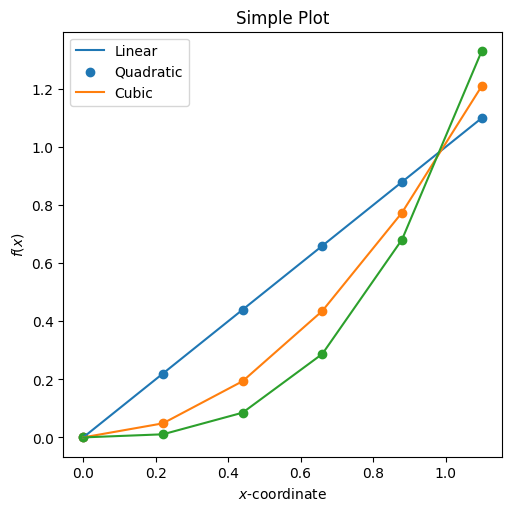

In [ ]:
x = np.linspace(0, 1.1, 6)  # Sample data. (start = 0, finish = 1, partitions = 6)

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.set_xlabel('$x$-coordinate')              # Add an x-label to the axes.
ax.set_ylabel('$f(x)$')                      # Add a y-label to the axes.

ax.plot(x, x, label='linear')                # Draw the Function
ax.scatter(x, x, label='linear')             # Draw Coodinate Points

ax.plot(x, t, label='quadratic')          # Plot more data on the axes...
ax.scatter(x, x**2, label='quadratic')       # Draw Coodinate Points

ax.plot(x, x**3, label='cubic')              # ... and some more.
ax.scatter(x, x**3, label='cubic')              # ... and some more.

ax.set_title("Simple Plot")                  # Add a title to the axes.
ax.legend(["Linear", "Quadratic", "Cubic"])  # Add a legend.

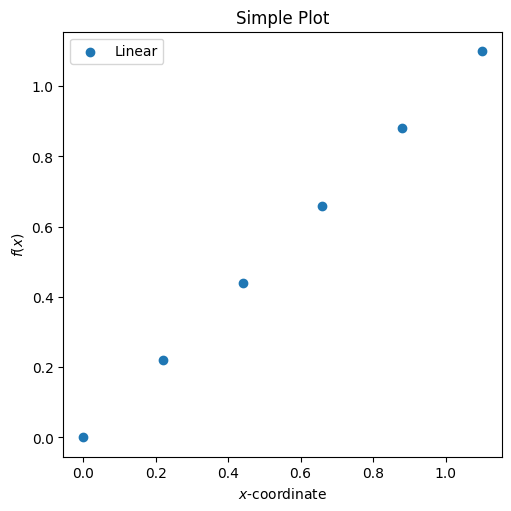

In [ ]:
# in here we are only plotting the (x,y) coordinates

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.set_xlabel('$x$-coordinate')
ax.set_ylabel('$f(x)$')

ax.scatter(x, x, label='linear')

ax.set_title("Simple Plot")
ax.legend(["Linear"])  # Add a legend.

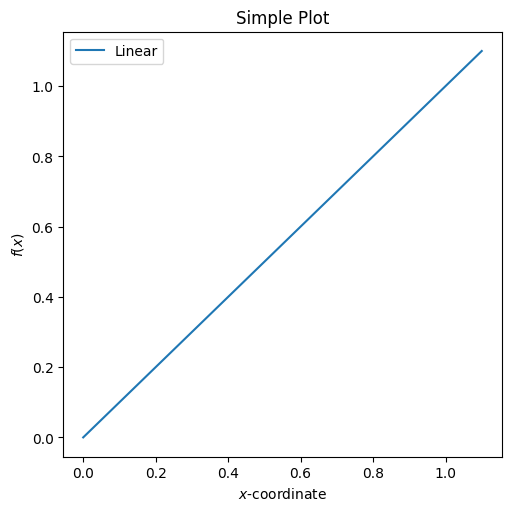

In [ ]:
# in here we are only plotting the function f(x) = x as a smooth curve

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.set_xlabel('$x$-coordinate')
ax.set_ylabel('$f(x)$')

ax.plot(x, x, label='linear')

ax.set_title("Simple Plot")
ax.legend(["Linear"])  # Add a legend.

In [ ]:
math.factorial(64)

126886932185884164103433389335161480802865516174545192198801894375214704230400000000000000

## Projectile Motion

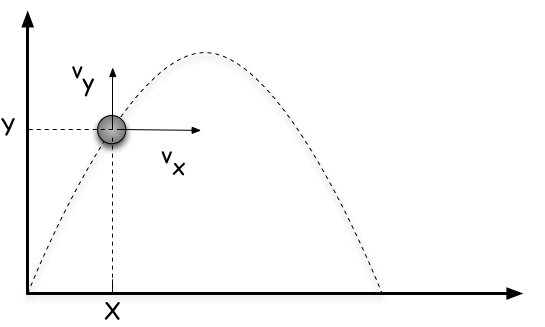


### Positions

$$ x(t) = x_0 + (v_0 cos\theta) t$$

$$ y(t) = y_0 + (v_0 sen \theta) t - \frac{gt^2}{2}$$

In [ ]:
import numpy as np

# with this functions we are going to get our data, so that we can plot it after

def x_pos(angle0,t,v0,x0):
    x = x0 + v0 * np.cos(angle0) * t
    return x

def y_pos(angle0,t,v0,y0):
    g = 9.8
    y = y0 + v0 * np.sin(angle0)*t - ((g*t**2)/2)
    return y

### Velocities

$$ v_x = \frac{dx}{dt} = v_0 \cos(\theta)$$

$$ v_y = \frac{dy}{dt} = -gt + v_0 \sin(\theta)$$

$$||v|| = \sqrt{v_x^2 + v_y^2}$$

In [ ]:
import numpy as np

def velx(angle,t,v0):
    vx = v0*np.cos(angle)
    return vx

def vely(angle,t,v0):
    g = 9.8
    vy = v0*np.sin(angle)-(g*t)
    return vy

def vel_mag(vx,vy):
    vmag = np.sqrt(vx*vx + vy*vy)
    return vmag

### Potential and Kinetic Energies

$$E = T + V$$

$$E = \frac{1}{2}mv^2 + mgh$$

In [ ]:
def KineticE(m,v):
    return 0.5*m*v**2

def PotentialE(m,h):
    g=9.8
    return m*g*h

### Visualization


Return evenly spaced numbers over a specified interval.

Returns num evenly spaced samples, calculated over the interval [start, stop].

The endpoint of the interval can optionally be excluded.

```
numpy.linspace(start, stop, amount)
```



In [ ]:
import matplotlib.pyplot as plt

a = np.linspace(0,9,10) # we create a list of numbers, evenly space between 0 and 9, a total of 10 numbers
print(a)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
t = np.linspace(0,11.75,1000) # we want to take 1000 pictures of the position between 0 and 11.75 seconds

In [ ]:
# this is somewhat confusing so let's go over it a little bit slow

# t in a numpy array

x = x_pos(np.pi/4,t,80,0)

y = y_pos(np.pi/4,t,80,0)

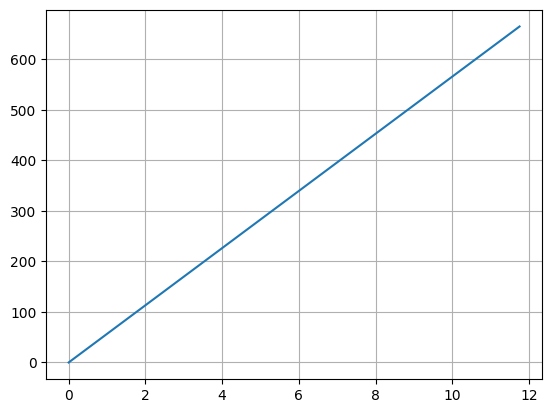

In [ ]:
plt.grid()
plt.plot(t,x)

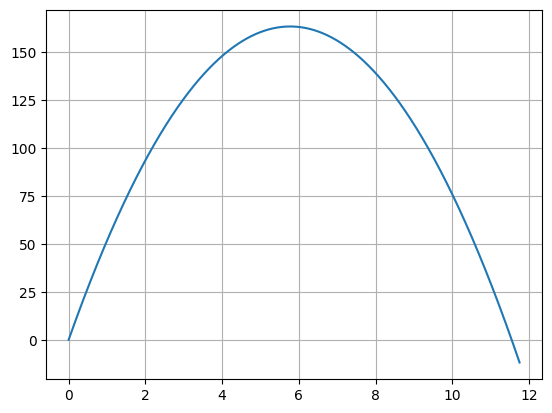

In [ ]:
plt.grid()
plt.plot(t,y)

In [ ]:
# let's plot the Total Energy

vx = np.ones(1000)*velx(np.pi/4,t,80)
vy = vely(np.pi/4,t,80)
vmod = vel_mag(vx,vy)

<Figure size 640x480 with 0 Axes>

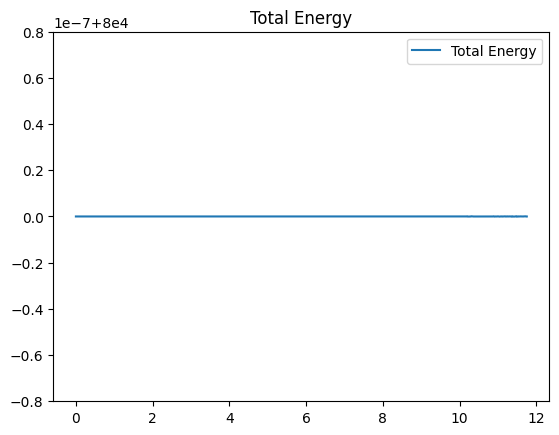

In [ ]:
fig = plt.figure()  # an empty figure with no Axes


fig, ax = plt.subplots()  # a figure with a single Axes
plt.plot(t,E, label='Total Energy')
ax.set_title("Total Energy")
plt.legend()

In [ ]:
T = KineticE(50,vy) #50kg vmod m/s
V = PotentialE(50,y)
E = T + V

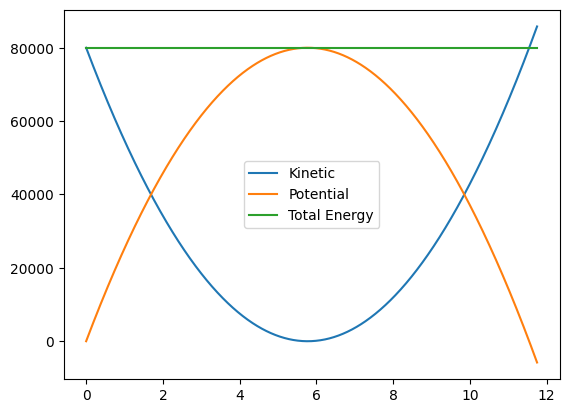

In [ ]:
plt.plot(t,T,label='Kinetic')
plt.plot(t,V, label='Potential')
plt.plot(t,E, label='Total Energy')
plt.legend()
plt.show()

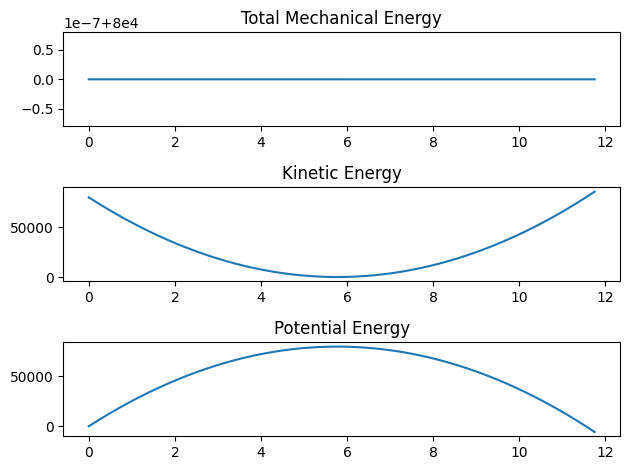

In [ ]:
fig, axs = plt.subplots(3, 1)  # a figure with a 2x2 grid of Axes
axs[0].plot(t,E, label='Total Energy')
axs[0].set_title("Total Mechanical Energy")
axs[1].plot(t,T,label='Kinetic')
axs[1].set_title("Kinetic Energy")
axs[2].plot(t,V, label='Potential')
axs[2].set_title("Potential Energy")
fig.tight_layout()

# Exercises you guys can do until next week

## 1.- First Exercise

Create a Graph for the movement of a particle moving in a circle

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t = np.linspace(0,20,100) # time (seconds)
w = np.pi/6 # rads/s

In [ ]:
x = np.cos(w*t)
y = np.sin(w*t)

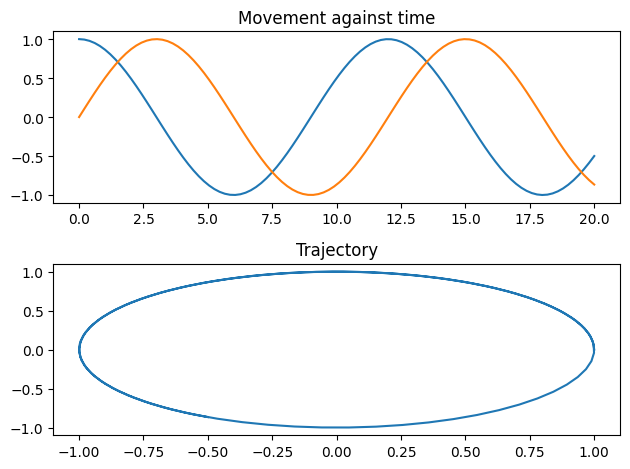

In [ ]:
fig, ax = plt.subplots(2,1)

ax[0].plot(t,x, label='hdistance vs time')
ax[0].plot(t,y, label='height vs time')
ax[0].set_title("Movement against time")

ax[1].plot(x,y, label='xy-plane')
ax[1].set_title("Trajectory")
fig.tight_layout()

# Additional Resources

- https://matplotlib.org/stable/
- https://numpy.org/doc/stable/index.html